##  1

方針

trainとtestをconcatして同一の前処理を適用していく。
処理
欠損値は中央値で補完
？列ごとに違う値で補完する方法

学習・予測
ロジスティック回帰で学習・予測


最後にSK_ID_CURRをくっつけて提出

結果:
クラスラベルの比率に偏りがあり、すべてのラベルを0と予測するように学習していた。
SK_ID_CURRを削除したら55程1と予測してaucも0.74まで向上

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [119]:
%pwd

'/home/ubuntu/kaggle/home_credit/work'

In [136]:
# application_train = pd.read_csv('../Input/application_train.csv')
# application_test = pd.read_csv('../Input/application_test.csv')
# application_train.to_pickle('../Pickle/application_train.pkl')
# application_test.to_pickle('../Pickle/application_test.pkl')

In [137]:
df_train.shape
# display(df_test)

(307511, 104)

In [138]:
df

array([[-0.57513695,  0.14489037, -0.45448921, ..., -0.25074859,
        -0.35653219, -0.44780914],
       [-0.57513695,  0.446895  ,  1.77043183, ..., -0.25074859,
        -0.35653219, -1.01476383],
       [-0.57513695, -0.4591189 , -1.13582824, ..., -0.25074859,
        -0.35653219, -1.01476383],
       ...,
       [ 0.81302455,  0.14489037, -0.68427392, ..., -0.25074859,
         3.69873501, -0.44780914],
       [-0.57513695,  0.24555858, -0.34560817, ..., -0.25074859,
        -0.35653219,  0.11914555],
       [-0.57513695, -0.15711426, -0.68987319, ..., -0.25074859,
         0.99522354,  1.25305492]])

In [139]:
df_train = pd.read_pickle('../Pickle/application_train.pkl')
df_test = pd.read_pickle('../Pickle/application_test.pkl')

y = df_train['TARGET'] # 先に目的変数だけ取っておく
df_train = df_train[[col for col in df_train.columns if col != 'TARGET']]

df = pd.concat([df_train,df_test])
df = df.drop('SK_ID_CURR',axis=1)

In [140]:
# df_train.TARGET
# 0    282686
# 1     24825
282686/(282686+24825)
91%が0になっている
1が支払期日から遅れてしまった人なのでほとんどの人は期日までに完済している。

SyntaxError: invalid character in identifier (<ipython-input-140-1c5c72908de8>, line 6)

In [141]:
# object型をすべて除外
df = df.select_dtypes(exclude=['object'])
# print(df.info(max_cols=1000))
# 中央値補完
# print('------------------',df.isnull().sum())
df = df.fillna(df.median())
# print('------------------',df.isnull().sum())

columns = df.columns
print(columns)
df = StandardScaler().fit_transform(df)
#fit transformの返り血がndarrayなのでisnull().sum()などが機能しなくなる可能性あり

# trainとtestデータに戻す
df_train = df[:307511]

X = df_train

df_test = df[307511:]

print(df_train.shape)
print(df_test.shape)

# display(X)
# display(y)

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=104)


/home/ubuntu/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(307511, 104)
(48744, 104)


/home/ubuntu/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
X.isnull().sum()

In [ ]:
df_train.describe()

In [ ]:
X.info(max_cols=1000)

In [142]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2,stratify=y)
print(X_train.shape)

# 学習
logreg.fit(X_train,y_train)


(246008, 104)


/home/ubuntu/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

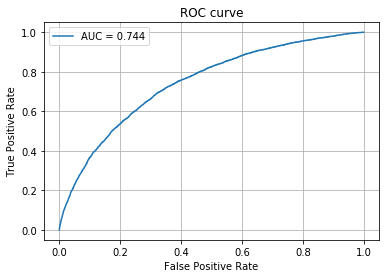

In [143]:
pred = logreg.predict_proba(X_test)[: , 1]
pred
#評価用モジュール
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
#ROC曲線プロット
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc_score = roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 2

In [146]:
df_test.shape

(48744, 104)

In [147]:
predict_y = logreg.predict(df_test)
predict_y
pd.value_counts(predict_y)

0    48688
1       56
dtype: int64

In [148]:
df_test2 = pd.read_pickle('../Pickle/application_test.pkl') # SK_ID_CURRを結合するためだけにdf_test2を使う
df_test2['SK_ID_CURR']
predict_y = pd.Series(predict_y)
predict_y = pd.concat([df_test2['SK_ID_CURR'],predict_y],axis=1)
predict_y = pd.DataFrame(predict_y)
predict_y.columns = ['SK_ID_CURR','TARGET']
display(predict_y)

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0
5,100042,0
6,100057,0
7,100065,0
8,100066,0
9,100067,0


In [149]:
type(predict_y)
predict_y.to_csv('../Output/submit.csv',index=None)

In [150]:
a = pd.read_csv('../Output/submit.csv') # 変えないと上書きされるので注意
pd.value_counts(a['TARGET'])

0    48688
1       56
Name: TARGET, dtype: int64

## 3

過程  
・RFEが一生終わらない(15分以上かかっていた気がする。今度プログレスバー導入しよう)  
・とりあえずランダムフォレスト分類で様子をみよう→AUC0.672  
・SK_ID_CURRがint型なので削除できてなかった→削除→数値データのみの粗処理のロジステック回帰でもAUC→0.744  
・SK_ID_CURR削除後のランダムフォレストの変数重要度を見たい→最高の変数重要度が0.06で話にならない →とりあえず真面目にデータを見よう  
・bureau.csvの以前のクレジットのデータみよう  
・ついてにほかのデータも全部pickle化しておこう

In [151]:
from sklearn.ensemble import RandomForestClassifier
fore = RandomForestClassifier(criterion='gini',n_estimators=25, random_state=0,n_jobs=-1)

fore.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

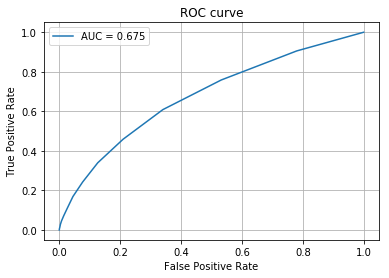

In [154]:
pred = fore.predict_proba(X_test)[: , 1]
pred
#評価用モジュール
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
#ROC曲線プロット
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc_score = roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [230]:
fti=fore.feature_importances_
fti = np.array(fti).reshape(104,1)
columns = np.array(list(columns)).reshape(104,1)
# print(columns)
a = pd.DataFrame(np.hstack((columns,fti)))
a.columns  = ['feature','fti']
a.columns
# a = np.array([])
# for i, feat in enumerate(columns):
#     print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))
#     a.insert(feat, fti[i])
# # plt.plot(np.linspace(1,105,105),np.sort(fore.feature_importances_)[::-1])

Index(['feature', 'fti'], dtype='object')

In [231]:
df_s = a.sort_values('fti')
print(df_s)


                          feature                     fti
86               FLAG_DOCUMENT_10                     0.0
80                FLAG_DOCUMENT_4                     0.0
88               FLAG_DOCUMENT_12                     0.0
11                     FLAG_MOBIL                     0.0
96               FLAG_DOCUMENT_20   0.0001065969741803538
97               FLAG_DOCUMENT_21   0.0001195478059174863
78                FLAG_DOCUMENT_2  0.00012012518653057741
95               FLAG_DOCUMENT_19  0.00012073714830741173
90               FLAG_DOCUMENT_14  0.00013988958081671778
89               FLAG_DOCUMENT_13  0.00014323600238836884
87               FLAG_DOCUMENT_11   0.0002827345882604584
14               FLAG_CONT_MOBILE  0.00030680461593723604
85                FLAG_DOCUMENT_9   0.0004685446618363578
92               FLAG_DOCUMENT_16   0.0006209427413993668
94               FLAG_DOCUMENT_18   0.0006518509097623715
98     AMT_REQ_CREDIT_BUREAU_HOUR   0.0007236124473646845
99      AMT_RE

この感じだと特定の特徴量を使用するのではなく、主成分分析か、もっと特徴量を観察するか

## 4